In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "D.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                #fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

52

#correct - this is the number of genes in the 4-way venn plot TpS vs TGF 

In [5]:
len(batch_per_gene)

52

In [6]:
len(fc_per_gene)

52

In [7]:
fc_per_gene

[-2.117445438,
 -1.788218582,
 -1.724223069,
 -1.668024231,
 -1.573372357,
 -1.572109988,
 -1.522030156,
 -1.509082007,
 -1.486606214,
 -1.448362003,
 -1.3953751,
 -1.35405058,
 -1.339552007,
 -1.335857218,
 -1.324023783,
 -1.320344501,
 -1.311790239,
 -1.271472327,
 1.2489222,
 1.272805716,
 1.303220375,
 1.309067048,
 1.317328824,
 1.317591748,
 1.327578495,
 1.377128797,
 1.415778011,
 1.420677799,
 1.428958224,
 1.447217848,
 1.461919646,
 1.463329518,
 1.46786406,
 1.477577124,
 1.485336938,
 1.492272693,
 1.547355948,
 1.600920897,
 1.607479878,
 1.61008226,
 1.677716574,
 1.714768747,
 1.723181843,
 1.81870421,
 1.828520915,
 1.844969105,
 1.970886768,
 2.044813929,
 2.127166718,
 2.290903588,
 2.382157509,
 3.04225881]

In [8]:
fc_inhibitor_per_gene

[]

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[]

In [10]:
interesting_indices = [i for i, left in enumerate(fc_per_gene) if left < -1]

In [11]:
len(interesting_indices)

18

In [12]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [13]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [14]:
#interesting_genes

In [15]:
#interesting_genes = list(interesting_genes['gene'])

In [16]:
interesting_genes = np.array(genes)[interesting_indices]

In [17]:
len(interesting_genes)

18

In [18]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [19]:
len(common_genes)

2

In [20]:
common_genes

{'PSD3', 'TMEM100'}

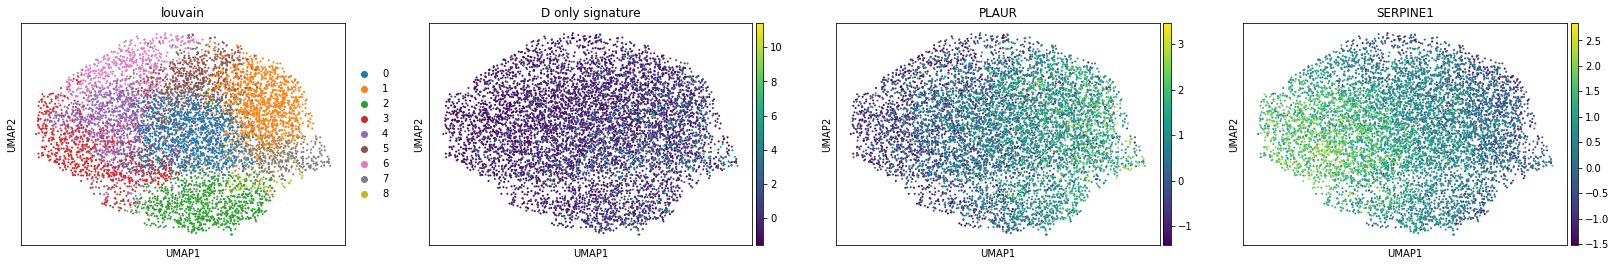

In [21]:
batch_2.obs["D only signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'D only signature', "PLAUR", "SERPINE1"])